In [ ]:
#!pip install sentence-transformers==0.3.3

In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np
import torch
from torch import nn

In [2]:
import json
with open("simplified_last_1000_keyphrases.json", "r") as f:
    lines = f.readlines()
pred_data = [json.loads(l) for l in lines]

In [3]:
#use_docs = 1000
#pred_data = pred_data[-use_docs:]

In [3]:
all_keyphrases = {}
total_keyphrases = 0
for i in pred_data:
    for j in i["pred"]:
        total_keyphrases+=1
        if j not in all_keyphrases:
            all_keyphrases[j] = 1
        else:
            all_keyphrases[j]= all_keyphrases[j]+1

In [4]:
total_keyphrases

14329

In [5]:
len(all_keyphrases.keys())

9897

In [6]:
sorted_lst = list(sorted(all_keyphrases.items(), key=lambda item: item[1], reverse=True))
sorted_lst[:10]

[('', 186),
 ('neural networks', 162),
 ('machine learning', 80),
 ('<unk>', 70),
 ('reinforcement learning', 67),
 ('deep learning', 64),
 ('learning', 59),
 ('neural network', 40),
 ('classification', 39),
 ('recurrent neural networks', 39)]

In [7]:
def top_keyphrases_of_topic(topic_ids):
    keyphrases = {}
    total_keyphrases = 0
    for idx, i in enumerate(pred_data):
        if idx in topic_ids:
            for j in i["pred"]:
                total_keyphrases+=1
                if j not in keyphrases:
                    keyphrases[j] = 1
                else:
                    keyphrases[j]= keyphrases[j]+1
    print("total keyphrases are: ", total_keyphrases)
    print("Unique nummber of keyphrases are:", len(keyphrases.keys()))
    return list(sorted(keyphrases.items(), key=lambda item: item[1], reverse=True))

In [8]:
#Topic 1
topic = [547, 226, 571, 792, 964, 916, 166, 193, 165, 662, 143, 98, 790, 649, 555, 590, 172, 561, 732, 200, 311, 67, 391, 86, 144, 553, 344, 951, 243, 960, 517, 467, 638, 475, 372, 179, 62, 413, 47, 198, 152, 442, 771, 786, 624, 256, 25, 39, 768, 986, 958, 535, 306, 515, 276, 831, 895, 825, 453, 390, 543, 45, 815, 558, 377, 666, 400, 548, 923, 50, 303, 929, 979, 6, 866, 23, 63, 937, 576, 419, 796, 877, 180, 915, 336, 239, 162, 909, 119, 738, 892, 8, 697, 944, 14, 500, 38, 801, 975, 873]
topic = [t - 1 for t in topic]
topic_keyphrases = top_keyphrases_of_topic(topic)
#print(topic_keyphrases[:50])

total keyphrases are:  1383
Unique nummber of keyphrases are: 1133


In [9]:
model_path = 'phrase-bert-model'
model = SentenceTransformer(model_path)

In [13]:
keyphrase_embs = model.encode([i[0] for i in topic_keyphrases])

ValueError: not enough values to unpack (expected 2, got 1)

In [17]:
similarity_matrix = np.empty((len(keyphrase_embs), len(keyphrase_embs)), dtype=float)

In [18]:
cos_sim = nn.CosineSimilarity(dim=0)
for row_idx, i in enumerate(keyphrase_embs):
    for col_idx, j in enumerate(keyphrase_embs):
        similarity_matrix[row_idx][col_idx] =  round(cos_sim(torch.tensor(i), torch.tensor(j)).item(), 2)

In [29]:
similarity_matrix

array([[1.  , 0.56, 0.61, ..., 0.54, 0.44, 0.54],
       [0.56, 1.  , 0.82, ..., 0.47, 0.33, 0.38],
       [0.61, 0.82, 1.  , ..., 0.56, 0.4 , 0.44],
       ...,
       [0.54, 0.47, 0.56, ..., 1.  , 0.47, 0.45],
       [0.44, 0.33, 0.4 , ..., 0.47, 1.  , 0.9 ],
       [0.54, 0.38, 0.44, ..., 0.45, 0.9 , 1.  ]])

In [28]:
a = similarity_matrix > 0.7

In [29]:
import matplotlib.pyplot as plt

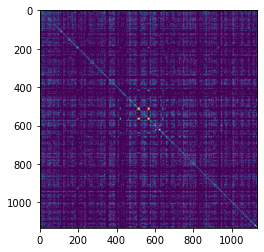

In [30]:
plt.imshow(a)

In [ ]:
print([i[0] for i in topic_keyphrases])

In [41]:
keyphrase_embedding = {}
for keyphrase, freq in all_keyphrases.items():
    keyphrase_embedding[keyphrase] = model.encode([keyphrase]).tolist()

In [42]:
len(keyphrase_embedding.keys())

9897

In [43]:
import json
with open('1000_docs_keyphrase_embedding.json', 'w') as fp:
    json.dump(keyphrase_embedding, fp)

# From json file

In [19]:
import json
with open('1000_docs_keyphrase_embedding.json') as json_file:
    kp = json.load(json_file)

In [28]:
kp.keys()

dict_keys(['style transfer', 'feature transforms', 'image processing', 'image power analysis', 'feature time', 'we analysis', 'neural networks', 'feature transform', 'we image processing', 'we image synthesis', 'networks', 'feature cross analysis', 'vqa', 'methods', '', 'we', 'method', 'gamma process', 'edge partition model', 'binary matrix', 'model for have prediction', 'learning from art', 'markov chain monte carlo', 'model samples', 'model shrinkage', 'are in at advocate', 'sketches', 'art', 'art lasso', 'model linear model', 'to this sketches', 'to this render', 'pose guided person generation network', 'pose guided person generation', 'pose classification', 'u game', 'person image synthesis', 'pose guided person that problem', 'u . which method', 'u . which evaluated', 'image . based modeling and synthesis', 'present value', 'in , g . transforms', 'u . which constraint', 'in , b . transforms', 'in , g , transforms', 'graphical models', 'semidefinite programming', 'sum - of - square